In [ ]:
Build the linear regression model using scikit learn in boston data to predict 'Price'
based on other dependent variable.



In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
bos.shape


(506, 13)

In [4]:
#To see predictor names in the dataframe as column headings
bos.columns=boston.feature_names
bos.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


##### boston itself is a dictionary object, containing target(price) as one of the keys. We will try to attach the target i.e. price as one of the columns of our dataframe bos



In [17]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [5]:
bos['PRICE']=boston.target
bos.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
# Wewill try to fit a linear regression model here
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
#Wewill store only the features or predictors in the dataframe X, so we remove the PRICE column from there
X=bos.drop("PRICE",axis=1)
lm.fit(X,bos.PRICE,)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
lm.intercept_

36.49110328036135

In [25]:
#below we see all the 13 coefficients for the individual features
lm.coef_

array([-1.07170557e-01,  4.63952195e-02,  2.08602395e-02,  2.68856140e+00,
       -1.77957587e+01,  3.80475246e+00,  7.51061703e-04, -1.47575880e+00,
        3.05655038e-01, -1.23293463e-02, -9.53463555e-01,  9.39251272e-03,
       -5.25466633e-01])

In [31]:
# feature called RM(avg numberof room per dwelling shows the highest corelation coefficient with PRICE) 
pd.DataFrame(list(zip(X.columns,lm.coef_)), columns=["feature name","estimated coefficient"])

,feature name,estimated coefficient
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


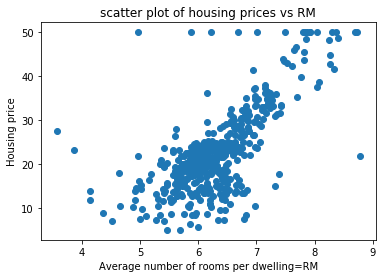

In [13]:
# more or less there exist a direct relation between the target and the feature here
plt.scatter(X.RM,bos.PRICE)
plt.xlabel("Average number of rooms per dwelling=RM")
plt.ylabel("Housing price")
plt.title("scatter plot of housing prices vs RM")
plt.show()

In [19]:
# Prediction of Price
lm.predict(X)[:10]

array([30.00821269, 25.0298606 , 30.5702317 , 28.60814055, 27.94288232,
       25.25940048, 23.00433994, 19.5347558 , 11.51696539, 18.91981483])

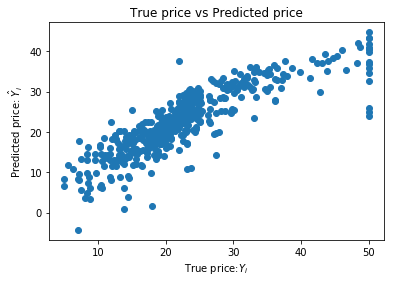

In [17]:
# plot of True price vs predicted price
plt.scatter(bos.PRICE,lm.predict(X))
plt.xlabel("True price:$Y_i$")
plt.ylabel("Predicted price: $\hat{Y}_i$")
plt.title("True price vs Predicted price")
plt.show()
#There is an agreement of the true price with the predicted price over most of the values except the higher ones where some disagreement or variation is visible
